<a href="https://colab.research.google.com/github/saadghojaria55/cnn/blob/main/Saad_Ghojaria_Neural_Network_Type_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Abstract
The purpose of this notebook is to perform charecter recognition on TMINST (94 charecter) dataset. We used a simple CNN network to perform the charecter recognition. 

##Importing Libraries and Fuctions

In [1]:
import numpy as np 
import pandas as pd 
import re

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

import tensorflow as tf 
from tensorflow.keras.utils import to_categorical


import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from google.colab import drive

## Reading Data


In [2]:
# Reading Data
url = "/content/drive/MyDrive/94_character_TMNIST.csv"
#df = h2o.import_file(path = url)
drive.mount('/content/drive')

df = pd.read_csv(url)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.head()

In [ ]:
df.describe()

Now lets dive into data : We have 2990 font-styles 

In [ ]:
names_of_font=df['names'].unique()
print(names_of_font)

count_of_font=df['names'].nunique()
print(count_of_font)

We have 94 characters, now lets see what kind of characters we have

In [ ]:
characters_count=df['labels'].nunique()
print(characters_count)

## Data Pre Porcessing :

We will need this splitting in order to correctly label the predictions

Step 1 : Defining types of data labels that can be present  <br>
1.   Alphabets 
2.   Numbers
3.   Symbols

Step 2 : Get the regex for each type of data labels 

Step 3 : Creating Groups for each of them


In [3]:
# Grouping All labels
all_ = list(df['labels'].unique())

# Regex Pattern to check alphabets, digits and special symbols
pattern_uc = re.compile(r"[A-Z]") #regex for capital alphabets
pattern_lc = re.compile(r"[a-z]")  #regex for small alphabets
pattern_numbers = re.compile(r"[0-9]")  #regex for numbers
pattern_symbols = re.compile(r"[\W]|[\_\,]")  #regex for Special Characters


# Extracting Pattern
lower_case = pattern_lc.findall(str(all_))
Upper_case = pattern_uc.findall(str(all_))
Numbers_ = pattern_numbers.findall(str(all_))
Symbols_ = list(set(pattern_symbols.findall(str(all_))))


# Creating Gropus
group = 1
for list_ in (lower_case,Upper_case,Numbers_,Symbols_):
    df.loc[df['labels'].isin(list_), 'group'] = str(group)
    group += 1
    #print(list_)
print("No of Categories:",group-1)


No of Categories: 4


In [4]:
# defining X and y for training
X = df.iloc[:, 2:-1].astype('float32') 
y  = df[['labels']] 

In [5]:
#preping the data to create dictionary
labels = y['labels'].unique()
values = [num for num in range(len(df['labels'].unique()))]
label_dict= dict(zip(labels,values)) #Creating Dictionary 
label_dict_inv = dict(zip(values,labels))

In [6]:
# Mapping
y['labels'].replace(label_dict, inplace=True) #Maping Values

In [7]:
#Checking the mappings
print(label_dict)
print(label_dict_inv)

{'6': 0, 'D': 1, 'f': 2, '/': 3, 'F': 4, 'x': 5, 'J': 6, '8': 7, 'H': 8, 'k': 9, '@': 10, '1': 11, '=': 12, 'g': 13, ')': 14, '2': 15, 'd': 16, '^': 17, '3': 18, 't': 19, '#': 20, '.': 21, '4': 22, 'o': 23, '"': 24, 'y': 25, 'A': 26, 'u': 27, 'G': 28, '-': 29, 'm': 30, 'W': 31, '&': 32, 'c': 33, '9': 34, 'N': 35, ']': 36, 'P': 37, 'X': 38, '|': 39, '}': 40, 'h': 41, '7': 42, 'j': 43, '5': 44, '>': 45, '?': 46, 'b': 47, '*': 48, 'w': 49, 'l': 50, '0': 51, '$': 52, 'I': 53, 'Y': 54, '%': 55, ':': 56, 'T': 57, 'K': 58, 'E': 59, '<': 60, 'V': 61, '{': 62, 'M': 63, 'S': 64, 'a': 65, 'i': 66, 'r': 67, "'": 68, 'p': 69, ';': 70, '[': 71, '+': 72, 'e': 73, 'U': 74, '(': 75, 's': 76, '~': 77, ',': 78, 'C': 79, 'q': 80, '_': 81, 'n': 82, 'B': 83, 'z': 84, 'v': 85, 'O': 86, 'R': 87, '`': 88, 'Z': 89, 'Q': 90, 'L': 91, '!': 92, '\\': 93}
{0: '6', 1: 'D', 2: 'f', 3: '/', 4: 'F', 5: 'x', 6: 'J', 7: '8', 8: 'H', 9: 'k', 10: '@', 11: '1', 12: '=', 13: 'g', 14: ')', 15: '2', 16: 'd', 17: '^', 18: '3', 

## Splitting Dataset 

In [8]:
# creating test train split of 80% and 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [9]:
# preping the inputs for training
Length, Height = 28,28 #lenght and height of the images we are giving it 28X28
NCl = y_train.nunique()[0] # Unique targets

# N of images 28x28
X_train = np.reshape(X_train.values, (X_train.shape[0] ,Length, Height)) 
X_test = np.reshape(X_test.values, (X_test.shape[0] ,Length, Height))

# Target into Categorical Values
y_train = to_categorical(y_train, NCl, dtype='int' )
y_test = to_categorical(y_test, NCl, dtype='int' )

print(f'X:Train, Test data shape:{X_train.shape},{X_test.shape}')
print(f'Y:Train, Test data shape:{y_train.shape},{y_test.shape}')

X:Train, Test data shape:(219274, 28, 28),(54819, 28, 28)
Y:Train, Test data shape:(219274, 94),(54819, 94)


##Sample Dataset

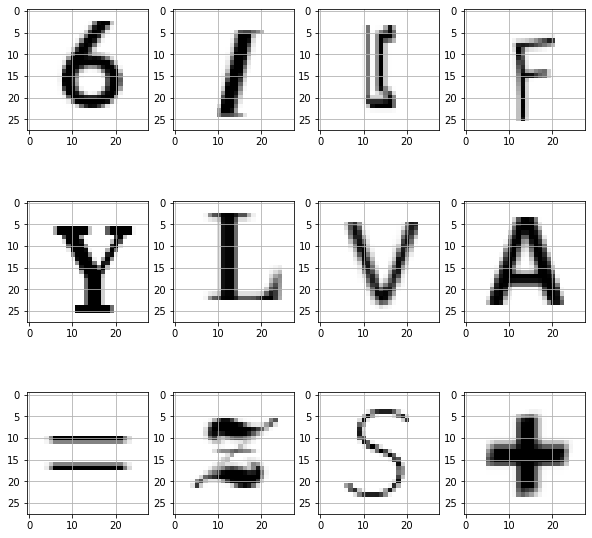

In [10]:
# displaying the charecters of our dataset
random = shuffle(X_train[:500]) #Randomly shuffle
fig,ax = plt.subplots(3,4 , figsize = (10,10)) 
axes = ax.flatten()
for i in range(12):
    img = np.reshape(random[i], (28,28)) # reshaping it for displaying
    axes[i].imshow(img, cmap="Greys")
    img_final =np.reshape(img, (1,28,28,1)) # reshapng it for passing into model for prediction
    axes[i].grid()

## Libraries and input for CNN

In [11]:
# importing libraries for building neural netwrok
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D,Flatten,Dropout,BatchNormalization
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [12]:
RGB = 1  # In this case only one instead of 3 because we dont have Color images
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1],X_train.shape[2], RGB)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2],RGB)

#normalizing the image data
X_train = X_train/255
X_test = X_test/255
print(f'Train, Test shapes: {X_train.shape},{X_test.shape}')

Train, Test shapes: (219274, 28, 28, 1),(54819, 28, 28, 1)


In [13]:
model = Sequential()

#5 Convolution 2D layers with 

model.add(Conv2D(filters = 32 , kernel_size = (3,3),input_shape = (Length, Height, RGB), padding = 'same',))
#filter are we are not defining which filter we are using but we can define how many filter we are using.
#so this filter will pass through image from left to right from top to bottom of pixels
model.add(Conv2D(filters = 64 , kernel_size = (3,3) ,padding = 'same')) 
#kernel is used to extract feature from the image there are 1X1 kernel 2X2 kernel max is 5X5 but that can take week or two to train the model
model.add(Conv2D(filters = 128 , kernel_size = (3,3) ,padding = 'same'))
#padding is for that it will give output of same size which input is given we can also use HALF in padding 
model.add(Conv2D(filters = 256 , kernel_size = (3,3) ,padding = 'same'))
#So we are giving 5 conv2D neural Networks and each time filters are doubled
model.add(Conv2D(filters = 512 , kernel_size = (3,3) ,padding = 'same'))

#To automatically standardize the inputs to a layer in a Convolution neural network.
model.add(BatchNormalization())

#The activation function defines the output of a neuron / node given an input or set of input (output of multiple neurons).
model.add(tf.keras.layers.Activation('relu'))

# max pooling is used to reduce the spatial dimensions
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.20))

#flatten function flattens the multi-dimensional input tensors into a single dimension
model.add(Flatten())
#A Dense layer feeds all outputs from the previous layer to all its neurons, each neuron providing one output to the next layer.
model.add(Dense(350))
model.add(BatchNormalization())

model.add(tf.keras.layers.Activation('relu'))
#dropout is used to prevent model from overfitting
model.add(Dropout(0.20))

#The softmax function is used as the activation function in the output layer of neural network models.
model.add(Dense(NCl, activation = 'softmax'))


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 256)       295168    
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 256)      1024      
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 28, 28, 256)       0         
                                                        

In [14]:
#defining parameters for training
optimizer  = Adam(learning_rate=0.01)
callback =EarlyStopping(monitor='loss', patience=5)
Batch_ = 64
Epochs_ = 20

model.compile(loss = 'categorical_crossentropy', optimizer = optimizer, metrics = ['accuracy'])


##Model Training

In [15]:
#Training
history= model.fit(X_train,y_train, validation_data = (X_test,y_test),batch_size = Batch_ ,
                   epochs = Epochs_, verbose = 1)

Epoch 1/20
3427/3427 [==============================] - 117s 33ms/step - loss: 0.4517 - accuracy: 0.8685 - val_loss: 0.5814 - val_accuracy: 0.8362
Epoch 2/20
3427/3427 [==============================] - 111s 32ms/step - loss: 0.3114 - accuracy: 0.9043 - val_loss: 0.2878 - val_accuracy: 0.9123
Epoch 3/20
3427/3427 [==============================] - 114s 33ms/step - loss: 0.2761 - accuracy: 0.9134 - val_loss: 0.2711 - val_accuracy: 0.9210
Epoch 4/20
3427/3427 [==============================] - 114s 33ms/step - loss: 0.2480 - accuracy: 0.9208 - val_loss: 0.2477 - val_accuracy: 0.9249
Epoch 5/20
3427/3427 [==============================] - 114s 33ms/step - loss: 0.2282 - accuracy: 0.9261 - val_loss: 0.2589 - val_accuracy: 0.9240
Epoch 6/20
3427/3427 [==============================] - 113s 33ms/step - loss: 0.2125 - accuracy: 0.9308 - val_loss: 0.2476 - val_accuracy: 0.9268
Epoch 7/20
3427/3427 [==============================] - 114s 33ms/step - loss: 0.1998 - accuracy: 0.9343 - val_loss: 0

##Model Accuracy

In [16]:
#Evaluating model accuracy on test data
score = model.evaluate(X_test,y_test, batch_size = Batch_,verbose = 0)
print(f"Test Accuracy:{round(score[1],4)*100}%")


Test Accuracy:93.57%


##Model Performance</h2>

In [17]:
# Function for Plotting
def Plott (data):
    fig, ax = plt.subplots(1,2 , figsize = (20,7))
    # summarize history for accuracy
    ax[0].plot(data.history['accuracy'])
    ax[0].plot(data.history['val_accuracy'])
    ax[0].set_title('model accuracy')
    ax[0].legend(['train', 'test'], loc='upper left')

    # summarize history for loss
    ax[1].plot(data.history['loss'], label =['loss'])
    ax[1].plot(data.history['val_loss'] ,label =['val_loss'])
    ax[1].set_title('model loss')
    ax[1].legend(['train', 'test'], loc='upper left')
    plt.show()

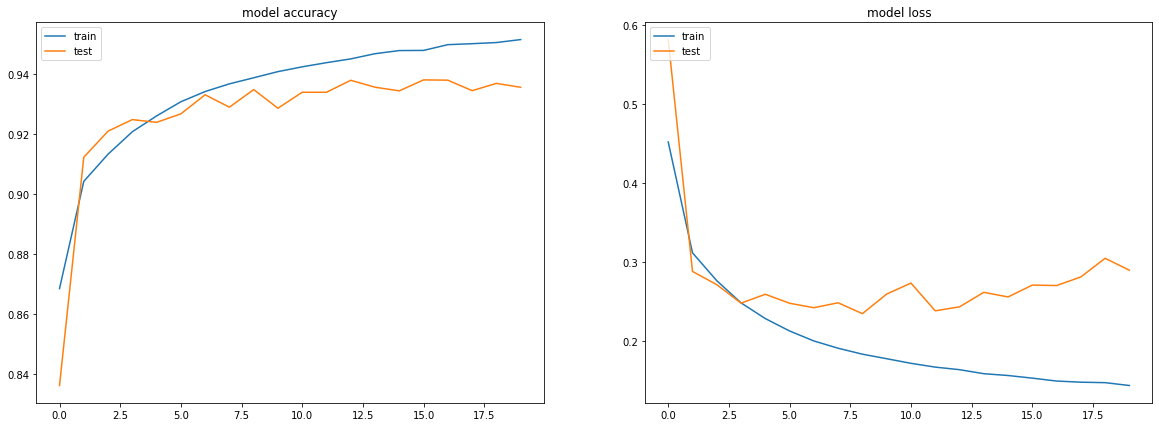

In [18]:
Plott(history)

## Model 2 with another layer

In [19]:
model_second = Sequential()

#5 Convolution 2D layers with 

model_second.add(Conv2D(filters = 32 , kernel_size = (3,3),input_shape = (Length, Height, RGB), padding = 'same',))
#filter are we are not defining which filter we are using but we can define how many filter we are using.
#so this filter will pass through image from left to right from top to bottom of pixels
model_second.add(Conv2D(filters = 64 , kernel_size = (3,3) ,padding = 'same')) 
#kernel is used to extract feature from the image there are 1X1 kernel 2X2 kernel max is 5X5 but that can take week or two to train the model
model_second.add(Conv2D(filters = 128 , kernel_size = (3,3) ,padding = 'same'))
#padding is for that it will give output of same size which input is given we can also use HALF in padding 
model_second.add(Conv2D(filters = 256 , kernel_size = (3,3) ,padding = 'same'))
#So we are giving 5 conv2D neural Networks and each time filters are doubled
model_second.add(Conv2D(filters = 512 , kernel_size = (3,3) ,padding = 'same'))

#To automatically standardize the inputs to a layer in a Convolution neural network.
model_second.add(BatchNormalization())

#The activation function defines the output of a neuron / node given an input or set of input (output of multiple neurons).
model_second.add(tf.keras.layers.Activation('relu'))

# max pooling is used to reduce the spatial dimensions
model_second.add(MaxPool2D(pool_size = (2,2)))
model_second.add(Dropout(0.20))

#flatten function flattens the multi-dimensional input tensors into a single dimension
model_second.add(Flatten())
#A Dense layer feeds all outputs from the previous layer to all its neurons, each neuron providing one output to the next layer.
model_second.add(Dense(350))
model_second.add(BatchNormalization())

model_second.add(tf.keras.layers.Activation('relu'))
#dropout is used to prevent model from overfitting
model_second.add(Dropout(0.20))

#The softmax function is used as the activation function in the output layer of neural network models.
model_second.add(Dense(NCl, activation = 'softmax'))


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 256)       295168    
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 256)      1024      
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 28, 28, 256)       0         
                                                        

In [21]:
#defining parameters for training
optimizer  = Adam(learning_rate=0.01)
callback =EarlyStopping(monitor='loss', patience=5)
Batch_ = 64
Epochs_ = 20

model_second.compile(loss = 'categorical_crossentropy', optimizer = optimizer, metrics = ['accuracy'])


In [22]:
#Training
history= model_second.fit(X_train,y_train, validation_data = (X_test,y_test),batch_size = Batch_ ,
                   epochs = Epochs_, verbose = 1)

Epoch 1/20
3427/3427 [==============================] - 286s 83ms/step - loss: 0.4571 - accuracy: 0.8686 - val_loss: 0.3649 - val_accuracy: 0.8940
Epoch 2/20
3427/3427 [==============================] - 282s 82ms/step - loss: 0.3124 - accuracy: 0.9044 - val_loss: 0.3305 - val_accuracy: 0.9020
Epoch 3/20
3427/3427 [==============================] - 281s 82ms/step - loss: 0.2752 - accuracy: 0.9137 - val_loss: 0.2716 - val_accuracy: 0.9164
Epoch 4/20
3427/3427 [==============================] - 278s 81ms/step - loss: 0.2481 - accuracy: 0.9209 - val_loss: 0.2537 - val_accuracy: 0.9244
Epoch 5/20
3427/3427 [==============================] - 278s 81ms/step - loss: 0.2286 - accuracy: 0.9263 - val_loss: 0.2376 - val_accuracy: 0.9295
Epoch 6/20
3427/3427 [==============================] - 276s 81ms/step - loss: 0.2118 - accuracy: 0.9311 - val_loss: 0.2469 - val_accuracy: 0.9302
Epoch 7/20
3427/3427 [==============================] - 276s 81ms/step - loss: 0.2015 - accuracy: 0.9335 - val_loss: 0

In [23]:
#Evaluating model accuracy on test data
score = model_second.evaluate(X_test,y_test, batch_size = Batch_,verbose = 0)
print(f"Test Accuracy:{round(score[1],4)*100}%")


Test Accuracy:93.69%


###Vizualising 2nd Model Accuracy 

In [24]:
# Function for Plotting
def Plott (data):
    fig, ax = plt.subplots(1,2 , figsize = (20,7))
    # summarize history for accuracy
    ax[0].plot(data.history['accuracy'])
    ax[0].plot(data.history['val_accuracy'])
    ax[0].set_title('model accuracy')
    ax[0].legend(['train', 'test'], loc='upper left')

    # summarize history for loss
    ax[1].plot(data.history['loss'], label =['loss'])
    ax[1].plot(data.history['val_loss'] ,label =['val_loss'])
    ax[1].set_title('model loss')
    ax[1].legend(['train', 'test'], loc='upper left')
    plt.show()

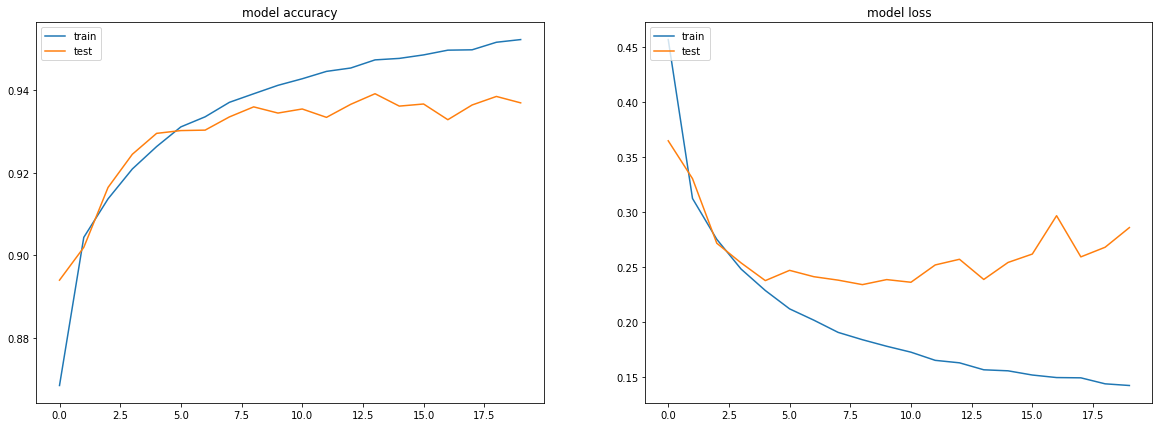

In [25]:
Plott(history)

##Lets do some Predictions
 
<p> Fingers Crossed :p </p>

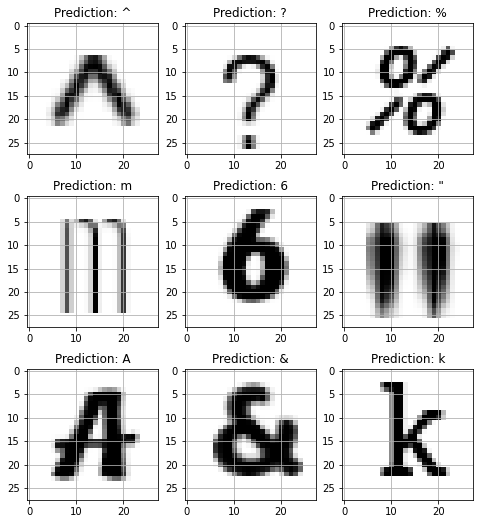

In [26]:
#predicting the charecters using trained model
fig, axes = plt.subplots(3,3, figsize=(8,9))
axes = axes.flatten()

for i,ax in enumerate(axes):
    img = np.reshape(X_test[i], (28,28)) # reshaping it for displaying
    ax.imshow(img, cmap="Greys")
    img_final =np.reshape(img, (1,28,28,1)) # reshapng it for passing into model for prediction
    pred = label_dict_inv[np.argmax(model.predict(img_final))]
    ax.set_title("Prediction: "+pred)
    ax.grid()

##Conclusion <br/>

1. The model performed good and was able to predict with 100% accuracy (9 out of 9 predictions are correct)<br>
2. The accuracy on test test is 93.69%

##Citations<br>

Dataset Author : Prof: Nik Bear Brown <br>
Dataset Link : https://www.kaggle.com/datasets/nikbearbrown/tmnist-alphabet-94-characters/code

##Licensing<br>
Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:<br>

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.<br>

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.